In [43]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [44]:
ourGenre = 'Biography'

In [45]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

Unnamed: 0     imdbID  Genre
0              0  tt0080684      0
1              1  tt0080684      0
2              2  tt0080684      0
3              3  tt0080377      0
4              4  tt0080377      0
...          ...        ...    ...
1373        1373  tt3884528      1
1374        1374  tt4188202      1
1375        1375  tt2293060      1
1376        1376  tt4344782      1
1377        1377  tt4568106      1

[1378 rows x 3 columns]

In [46]:
genre = []
poster = []

In [47]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [48]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

1378
1378
100
100
3


In [49]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [50]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

1378


In [51]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [52]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1240
1240
138
138


In [53]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [54]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (1240, 100, 100, 3)
1240 train samples
138 test samples


In [55]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(1240, 2)
(138, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[1. 0.]


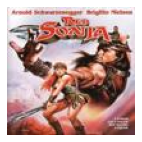

[1. 0.]
Not Biography


In [56]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [57]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dropout_2 (Dropout)         (None, 20000)            

In [59]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [41]:
# Loads the weights
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
model.load_weights(checkpoint_path)
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 - 2s - loss: 0.0773 - accuracy: 0.9855 - 2s/epoch - 487ms/step
Restored model, accuracy: 98.55%


In [65]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
8/8 [==============================] - 10s 1s/step - loss: 0.0811 - accuracy: 0.9829 - val_loss: 0.5328 - val_accuracy: 0.8145
Epoch 2/5
8/8 [==============================] - 10s 1s/step - loss: 0.0669 - accuracy: 0.9879 - val_loss: 0.5230 - val_accuracy: 0.8306
Epoch 3/5
8/8 [==============================] - 11s 1s/step - loss: 0.0581 - accuracy: 0.9899 - val_loss: 0.5344 - val_accuracy: 0.8266
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.0537 - accuracy: 0.9940 - val_loss: 0.5777 - val_accuracy: 0.8105
Epoch 5/5
8/8 [==============================] - 11s 1s/step - loss: 0.0457 - accuracy: 0.9950 - val_loss: 0.5599 - val_accuracy: 0.8306


(138, 2)


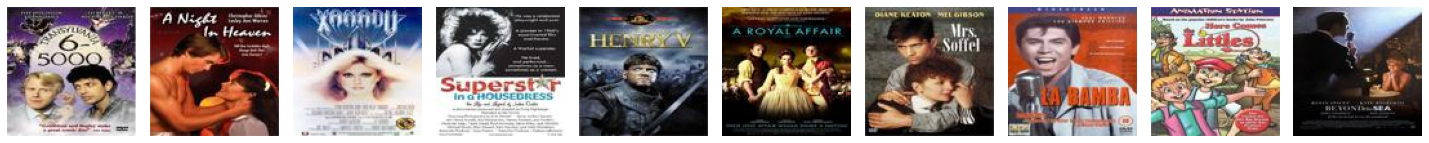

[0.8664939  0.13350606]
0
Genre is Not Biography Predicted is Not Biography ([0.8664939  0.13350606])
Genre is Not Biography Predicted is Not Biography ([0.82749146 0.17250852])
Genre is Not Biography Predicted is Not Biography ([0.7164821 0.283518 ])
Genre is Biography Predicted is Not Biography ([0.87162936 0.1283706 ])
Genre is Biography Predicted is Biography ([0.2963801 0.7036199])
Genre is Biography Predicted is Not Biography ([0.9352288  0.06477112])
Genre is Not Biography Predicted is Biography ([0.40485278 0.59514725])
Genre is Biography Predicted is Biography ([0.46907157 0.53092843])
Genre is Not Biography Predicted is Biography ([0.3012307 0.6987693])
Genre is Biography Predicted is Biography ([0.2690755  0.73092455])


In [19]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [66]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

5/5 [==============================] - 0s 55ms/step - loss: 0.3254 - accuracy: 0.9203
Test Loss: 32.54%
Test Accuracy:  92.03%


In [67]:
model.save_weights(checkpoint_path)